In [18]:
# loading module 

import pandas as pd

import numpy as np

from faker import Faker

import random

from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import datetime
# Sample categories and their items with price ranges
categories = {
    "Housing": {
        "Rent Payment": (8000, 30000),
        "Mortgage Payment": (10000, 40000),
        "Property Taxes": (1000, 5000),
        "Home Insurance": (500, 2000),
        "Home Repairs": (2000, 10000),
        "HOA Fees": (500, 3000),
        "Utilities Included": (0, 2000),
        "Home Security System": (1000, 5000),
        "Furnishings": (5000, 20000),
        "Appliance Purchases": (5000, 30000)
    },
    "Utilities": {
        "Electricity Bill": (500, 3000),
        "Water Bill": (200, 1000),
        "Gas Bill": (300, 1500),
        "Internet Service": (500, 2000),
        "Mobile Phone Bill": (300, 1500),
        "Waste Disposal Fees": (200, 500),
        "Cable TV Subscription": (500, 2000),
        "Sewer Charges": (200, 1000),
        "Home Heating Costs": (1000, 5000),
        "Maintenance Fees": (500, 2000)
    },
    "Transportation": {
        "Fuel Costs": (2000, 10000),
        "Public Transit Pass": (500, 1500),
        "Car Maintenance": (1000, 5000),
        "Car Insurance": (1000, 3000),
        "Parking Fees": (200, 1000),
        "Ride-Sharing Services": (300, 2000),
        "Vehicle Registration Fees": (500, 2000),
        "Toll Charges": (100, 500),
        "Bicycle Repairs": (200, 1000),
        "Car Loan Payment": (3000, 10000)
    },
    "Groceries": {
        "Fruits And Vegetables": (500, 2000),
        "Meat And Fish": (1000, 5000),
        "Dairy Products": (500, 2000),
        "Staple Grains": (300, 1500),
        "Snacks And Beverages": (300, 1500),
        "Cleaning Supplies": (500, 2000),
        "Frozen Foods": (300, 1500),
        "Baking Ingredients": (200, 1000),
        "Condiments And Spices": (200, 1000),
        "Organic Produce": (500, 3000)
    },
    "Dining Out": {
        "Dinner At A Restaurant": (800, 3000),
        "Lunch Takeaway": (200, 800),
        "Fast Food Meal": (150, 600),
        "Coffee Shop Visit": (100, 500),
        "Brunch With Friends": (300, 1200),
        "Special Occasion Dinner": (1000, 5000),
        "Street Food": (100, 500),
        "Buffet Meals": (500, 2000),
        "Desserts And Treats": (100, 500),
        "Beverages At Bars": (300, 1500),
        "Snacks From A Convenience Store": (100, 500)
    },
    "Subscriptions": {
        "Streaming Services": (300, 1000),
        "Digital Magazine Subscriptions": (100, 500),
        "Software Licenses": (500, 2000),
        "Gym Membership": (500, 3000),
        "Online Learning Platforms": (500, 5000),
        "Cloud Storage Services": (100, 500),
        "Meal Kit Subscriptions": (1000, 3000),
        "Gaming Subscriptions": (300, 1500),
        "Audiobook Services": (300, 1000),
        "News Websites Subscription": (200, 1000)
    },
    "Health & Fitness": {
        "Gym Membership": (500, 3000),
        "Medical Consultations": (500, 5000),
        "Health Insurance Premiums": (1000, 5000),
        "Yoga Classes": (200, 1000),
        "Nutritional Supplements": (500, 2000),
        "Physical Therapy Sessions": (500, 3000),
        "Wellness Programs": (300, 1500),
        "Health Screenings": (500, 2000),
        "Personal Training Sessions": (1000, 5000),
        "Fitness Apps": (100, 500)
    },
    "Entertainment": {
        "Movie Tickets": (200, 800),
        "Concert Tickets": (500, 3000),
        "Hobby Supplies": (200, 1500),
        "Video Games": (1000, 5000),
        "Books And E-Books": (200, 1000),
        "Board Games": (500, 2000),
        "Streaming Equipment": (1000, 5000),
        "Theater Performances": (500, 3000),
        "Art Supplies": (300, 1500),
        "Sports Events Tickets": (500, 3000)
    },
    "Clothing": {
        "Casual Wear": (500, 3000),
        "Work Attire": (1000, 5000),
        "Footwear": (500, 3000),
        "Fashion Accessories": (200, 1000),
        "Seasonal Clothing": (1000, 5000),
        "Athletic Wear": (500, 3000),
        "Formal Wear": (2000, 10000),
        "Underwear And Socks": (200, 1000),
        "Children's Apparel": (500, 3000),
        "Tailoring Services": (200, 1000)
    },
    "Travel": {
        "Airfare": (3000, 50000),
        "Hotel Accommodation": (1000, 20000),
        "Car Rentals": (1000, 5000),
        "Tour Activities": (500, 5000),
        "Travel Insurance": (500, 3000),
        "Dining While Traveling": (500, 3000),
        "Souvenirs": (200, 2000),
        "Local Transportation": (100, 1000),
        "Baggage Fees": (500, 2000),
        "Travel Accessories": (500, 5000)
    }
}

# Function to create a transaction
def create_transaction(date, category, description, amount=None):
    """
    Create a transaction record with given details.

    This function generates a transaction dictionary with specified or random values.

    Parameters:
    date (datetime.date): The date of the transaction.
    category (str): The category of the transaction.
    description (str): A description of the transaction.
    amount (float, optional): The transaction amount. If None, a random amount is generated.

    Returns:
    dict: A dictionary containing transaction details including Date, Category, Payment Mode,
          Description, Amount Paid, and Cashback.
    """
    if amount is None:
        amount = round(random.uniform(*categories[category][description]), 2)
    payment_mode = random.choice(["Cash", "Online"])
    cashback = round(amount * random.uniform(0, 0.1), 2)  # Cashback up to 10% of the amount
    return {
        "Date": date,
        "Category": category,
        "Payment Mode": payment_mode,
        "Description": description,
        "Amount Paid": amount,
        "Cashback": cashback
    }

# Function to enforce constraints
def enforce_constraints(data, month, year):
    """
    Enforce specific constraints on the transaction data for a given month and year.

    This function ensures that certain one-time expenses are included in the data#+
    and applies specific rules for magazine subscriptions.#+

    Parameters:
    data (list): A list of dictionaries, where each dictionary represents a transaction.
    month (int): The month for which the constraints are being enforced (1-12).
    year (int): The year for which the constraints are being enforced.

    Returns:
    list: The modified list of transactions with enforced constraints.
    """
    # One-time expenses for the month
    one_time_expenses = [
        "Internet Service", "Mobile Phone Bill", "Electricity Bill", 
        "Water Bill", "Gym Membership", "Public Transit Pass"
    ]
    for expense in one_time_expenses:
        if not any(row["Description"] == expense for row in data):
            category = "Utilities" if expense in categories["Utilities"] else "Subscriptions"
            if expense == "Public Transit Pass":
                category = "Transportation"
            data.append(create_transaction(datetime.date(year, month, 1), category, expense))

    # Magazine subscription constraints
    magazine_issues = [row for row in data if row["Description"] == "Digital Magazine Subscriptions"]
    if magazine_issues:
        issues_dates = [issue["Date"] for issue in magazine_issues]
        if any(date.day >= 10 and date.day <= 15 for date in issues_dates):
            # Ensure only one type of magazine subscription per month
            data = [row for row in data if not (row["Description"] == "Digital Magazine Subscriptions" and row["Date"].day >= 10 and row["Date"].day <= 15)]
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(5, 500), 2)))
        else:
            data.append(create_transaction(random.choice(issues_dates), "Subscriptions", "Digital Magazine Subscriptions", amount=round(random.uniform(50, 200), 2)))

    return data

# Function to generate monthly data
# This `generate_monthly_data` function is responsible for creating a set of transaction data for a specific month and year.
# Here's a breakdown of what it does:
# 1. It initializes an empty list to store the transaction data.
# 2. It calculates the number of days in the given month.
# 3. It generates category-specific patterns of transactions based on the day of the month.
    # 4. It generates random transactions for each day of the month based on the specified patterns.
    # 5. It generates one-time expenses for the given month.
    # 6. It applies magazine subscription constraints if applicable.
    # 7. It ensures that the total number of rows in the data is exactly 100.
    # 8. It returns the generated transaction data.
def generate_monthly_data(month, year):
    data = []
    start_date = datetime.date(year, month, 1)
    days_in_month = (datetime.date(year, month + 1, 1) - datetime.timedelta(days=1)).day if month < 12 else 31

    # Generate category-specific patterns
    for day in range(1, days_in_month + 1):
        date = start_date + datetime.timedelta(days=day - 1)  # Add random transactions
        for _ in range(random.randint(1, 5)):
            category = random.choice(list(categories.keys()))
            description = random.choice(list(categories[category].keys()))
            data.append(create_transaction(date, category, description))
        
        # Specific patterns
        if day % 7 == 0:
            data.append(create_transaction(date, "Dining Out", "Dinner At A Restaurant"))
        if day % 3 == 0:
            data.append(create_transaction(date, "Dining Out", "Coffee Shop Visit"))
    
    # Enforce constraints
    data = enforce_constraints(data, month, year)

    # Ensure exactly 100 rows of data
    if len(data) > 100:
        data = data[:100]  #100 rows
    while len(data) < 100:
        date = start_date + datetime.timedelta(days=random.randint(0, days_in_month - 1))
        category = random.choice(list(categories.keys()))
        description = random.choice(list(categories[category].keys()))
        data.append(create_transaction(date, category, description))

    # Sort by date
    data = sorted(data, key=lambda x: x["Date"])
    return pd.DataFrame(data)

# Generate and save data for 12 monthsThe `generate_yearly_data(year)` function is responsible for generating and saving transaction data for each month of a specific year.
# Here's a breakdown of what it does:
# 1. It iterates over each month from January to December.
# 2. It generates monthly data using the `generate_monthly_data` function.
# 3. It saves the monthly data to a CSV file with a specific naming convention.
# The function is then executed for a specific year (e.g., 2023) to generate the data files for each month.

def generate_yearly_data(year):
    for month in range(1, 13):
        monthly_data = generate_monthly_data(month, year)
        monthly_data.to_csv(f'monthly_data_{year}_{month}.csv', index=False)

# Execute
generate_yearly_data(2023)

In [20]:
# List of CSV files to combine for each month from January to December
csv_files = [
    'monthly_data_2023_1.csv',
    'monthly_data_2023_2.csv',
    'monthly_data_2023_3.csv',
    'monthly_data_2023_4.csv',
    'monthly_data_2023_5.csv',
    'monthly_data_2023_6.csv',
    'monthly_data_2023_7.csv',
    'monthly_data_2023_8.csv',
    'monthly_data_2023_9.csv',
    'monthly_data_2023_10.csv',
    'monthly_data_2023_11.csv',
    'monthly_data_2023_12.csv'
]

# Read and concatenate all specified CSV files into a single DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

print("All monthly data for the year 2023 has been combined into 'combined_data.csv'.")

All monthly data for the year 2023 has been combined into 'combined_data.csv'.


### Performing EDA For Combine_Data.

### Loading The Dataset.

In [21]:
df = pd.read_csv('combined_data.csv')

In [22]:
# seeing the top 5 rows

df.head()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
0,2023-01-01,Clothing,Cash,Athletic Wear,2451.52,93.64
1,2023-01-01,Health & Fitness,Online,Personal Training Sessions,3199.94,46.80
2,2023-01-01,Subscriptions,Cash,Cloud Storage Services,459.39,34.12
3,2023-01-01,Clothing,Online,Formal Wear,2065.88,76.83
4,2023-01-02,Clothing,Cash,Fashion Accessories,350.35,33.80


In [23]:
# For Displaying Last Five Rows.

df.tail()

,Date,Category,Payment Mode,Description,Amount Paid,Cashback
1195,2023-12-30,Dining Out,Online,Lunch Takeaway,520.22,41.93
1196,2023-12-30,Utilities,Cash,Gas Bill,1220.46,44.38
1197,2023-12-30,Dining Out,Online,Coffee Shop Visit,180.99,13.85
1198,2023-12-31,Clothing,Online,Underwear And Socks,391.68,4.25
1199,2023-12-31,Transportation,Online,Car Insurance,2033.04,95.25


In [24]:
# For Displaying No Of Rows & Columns In Our Data.

df.shape

(1200, 6)

### Statistical Insight.

- This Step Is Performed For Getting Details About Various Details Like Count,Mean,Std(Standard Deviation),Min,Max,Median.

In [25]:
df.describe()

,Amount Paid,Cashback
count,1200.00000,1200.000000
mean,2454.72940,120.954433
std,4951.85932,305.970911
min,26.00000,0.010000
25%,500.70500,16.975000
50%,1050.12500,40.945000
75%,2206.20750,104.640000
max,45263.34000,3919.340000


### Data Cleaning.

- This Step Is The Most Importand Step In EDA Involving Removing Duplicate Rows/Columns,
Filling The Void Entries With Values Like Mean/Median Of The Data,Dropping Various Values,
Removing Null Entries.

### Checking Null Entries.

In [26]:
# It Gives The Number Of Missing Values For Each Variable.


df.isnull().sum()

Date            0
Category        0
Payment Mode    0
Description     0
Amount Paid     0
Cashback        0
dtype: int64

### Checking Duplicates.

In [27]:
# Returning Total Number Of Duplicates Entries.

df.duplicated().sum()

np.int64(0)

### Checking Data Type For Each Column.

In [28]:
# It Will Give The Data Type For Each Column.

df.dtypes

Date             object
Category         object
Payment Mode     object
Description      object
Amount Paid     float64
Cashback        float64
dtype: object

### Data Visualization.

1. Bar Chart

### 1. ***Spending By Category***.


                         sum          mean  count
Category                                         
Clothing           206340.16   1810.001404    114
Dining Out         210339.67    808.998731    260
Entertainment      190119.28   1558.354754    122
Groceries          115321.21   1213.907474     95
Health & Fitness   165408.95   1797.923370     92
Housing           1056613.31  10358.954020    102
Subscriptions      113714.15   1093.405288    104
Transportation     214946.33   2047.107905    105
Travel             557324.43   5463.965000    102
Utilities          115547.79   1111.036442    104


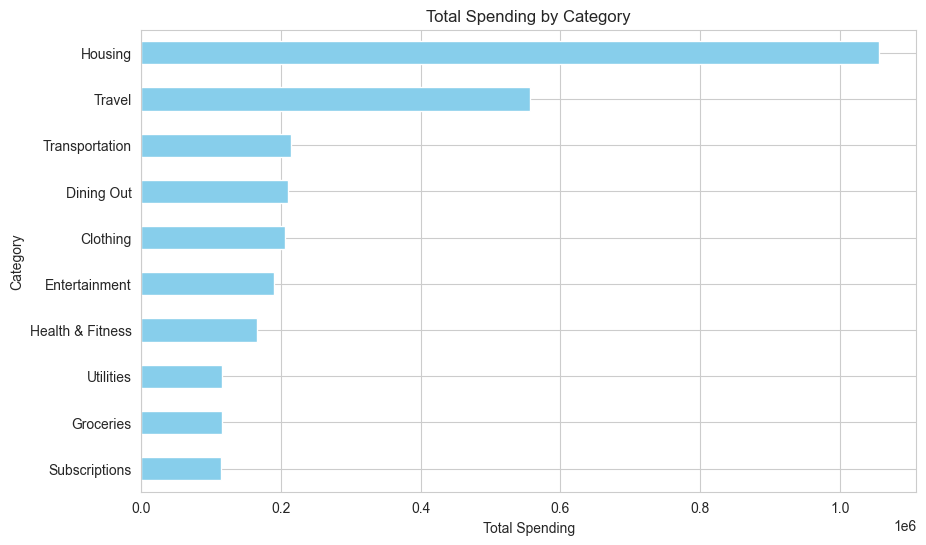

In [ ]:
category_stats = df.groupby('Category')['Amount Paid'].agg(['sum', 'mean', 'count'])
print(category_stats)

# Plot total spending by category
plt.figure(figsize=(10, 6))
category_stats['sum'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Spending by Category')
plt.xlabel('Total Spending')
plt.ylabel('Category')
plt.show()

## ***Monthly Spending Trends***.

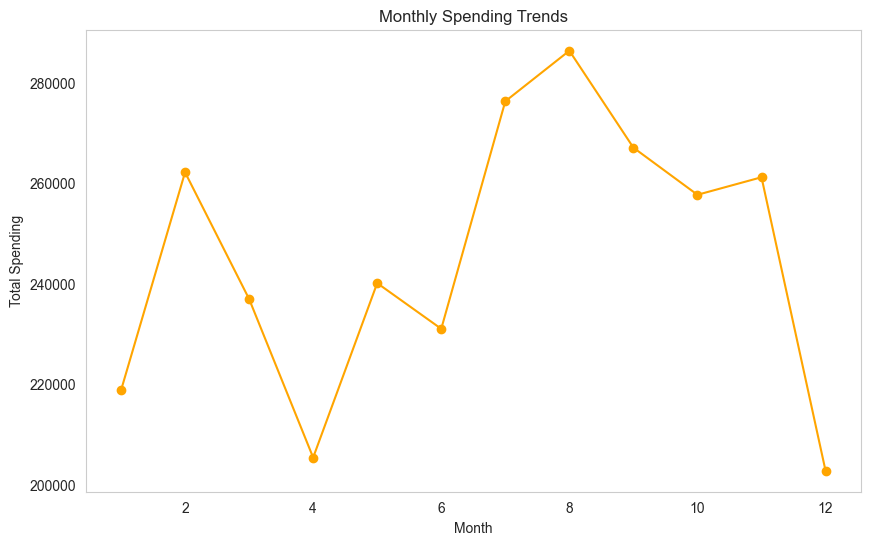

In [30]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Month'] = df['Date'].dt.month

# Group by month
monthly_spending = df.groupby('Month')['Amount Paid'].sum()

# Plot monthly spending
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Spending Trends')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid()
plt.show()


## ***Cashback Analysis***.

count    1200.000000
mean        4.866943
std         2.912443
min         0.008607
25%         2.219182
50%         4.754283
75%         7.485319
max         9.999583
Name: Cashback Percentage, dtype: float64


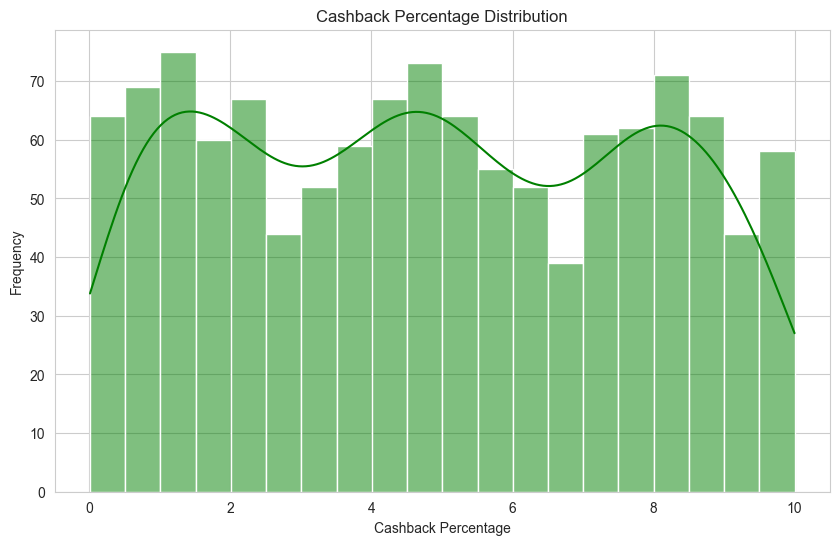

In [31]:
# Calculate cashback percentage
df['Cashback Percentage'] = (df['Cashback'] / df['Amount Paid']) * 100

# Summary of cashback
cashback_stats = df['Cashback Percentage'].describe()
print(cashback_stats)

# Plot cashback distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Cashback Percentage'], kde=True, bins=20, color='green')
plt.title('Cashback Percentage Distribution')
plt.xlabel('Cashback Percentage')
plt.ylabel('Frequency')
plt.show()


## ***Payment Mode Insight***.

                     sum         mean  count
Payment Mode                                
Cash          1315687.82  2324.536784    566
Online        1629987.46  2570.958139    634


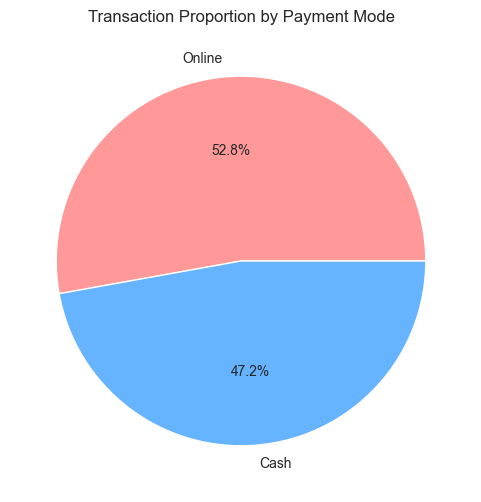

In [32]:
# Group by Payment Mode
payment_mode_stats = df.groupby('Payment Mode')['Amount Paid'].agg(['sum', 'mean', 'count'])
print(payment_mode_stats)

# Plot proportion of transactions by Payment Mode
payment_mode_counts = df['Payment Mode'].value_counts()
plt.figure(figsize=(6, 6))
payment_mode_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Transaction Proportion by Payment Mode')
plt.ylabel('')
plt.show()


## ***Identify High-Cost Description***.

                              sum          mean  count
Description                                           
Mortgage Payment        366989.47  22936.841875     16
Airfare                 276772.39  30752.487778      9
Rent Payment            248904.65  17778.903571     14
Appliance Purchases     190648.86  14665.296923     13
Furnishings             138284.59  13828.459000     10
Hotel Accommodation     124207.84  10350.653333     12
Dinner At A Restaurant   97025.45   1940.509000     50
Fuel Costs               65584.23   6558.423000     10
Video Games              52672.86   3098.403529     17
Tour Activities          44312.66   2769.541250     16


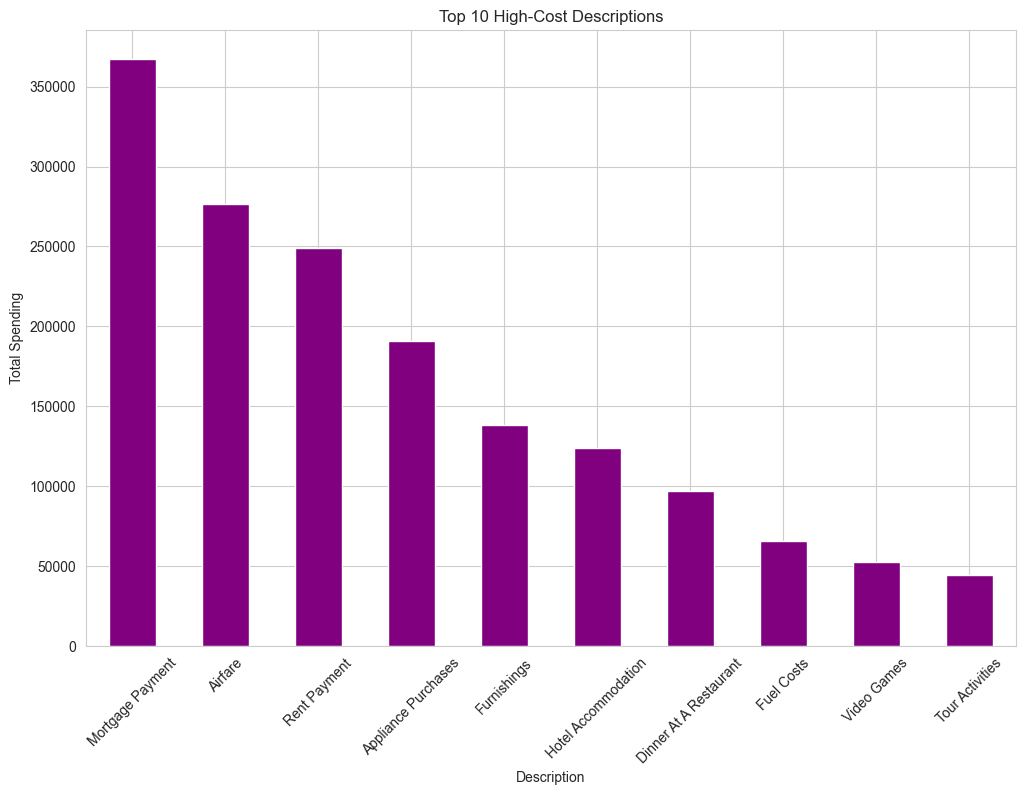

In [33]:
# Group by description for high-cost items
description_stats = df.groupby('Description')['Amount Paid'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
print(description_stats.head(10))

# Plot top descriptions by total spending
plt.figure(figsize=(12, 8))
description_stats['sum'].head(10).plot(kind='bar', color='purple')
plt.title('Top 10 High-Cost Descriptions')
plt.xlabel('Description')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()
